## Feature Construction

#### Developed a Customer Loan Approval Prediction system utilizing advanced machine learning techniques to accurately assess the probability of loan repayment and evaluate customer credit risk. This system aids financial institutions in making informed lending decisions, thereby minimizing default rates and optimizing loan portfolio performance.

In [2]:
import pandas as pd
import seaborn as sns

train_df=pd.read_csv("final_dataset.csv")
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             1212 non-null   object 
 1   Married            1212 non-null   object 
 2   Dependents         1212 non-null   object 
 3   Education          1212 non-null   object 
 4   Self_Employed      1212 non-null   object 
 5   ApplicantIncome    1212 non-null   int64  
 6   CoapplicantIncome  1212 non-null   float64
 7   LoanAmount         1212 non-null   float64
 8   Loan_Amount_Term   1212 non-null   float64
 9   Credit_History     1212 non-null   float64
 10  Property_Area      1212 non-null   object 
 11  Risk_Cluster       1212 non-null   int64  
 12  Risk_Probability   1212 non-null   float64
 13  Loan_Status        1212 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 132.7+ KB


In [55]:
train_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Risk_Cluster         0
Risk_Probability     0
Loan_Status          0
dtype: int64

In [56]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Risk_Cluster,Risk_Probability
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,5348.589934,1626.305148,145.036304,342.376238,0.855611,4.769802,0.473020
std,5959.855470,2938.424771,82.708728,64.434762,0.351629,2.588926,0.258893
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.050000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000,3.000000,0.150000
50%,3812.000000,1210.000000,127.000000,360.000000,1.000000,4.000000,0.550000
75%,5780.000000,2306.000000,164.250000,360.000000,1.000000,8.000000,0.650000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,9.000000,0.950000


In [57]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Risk_Cluster,Risk_Probability,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,4,0.55,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4,0.55,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4,0.55,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,8,0.15,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4,0.55,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4,0.55,Y
1208,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,7,0.25,Y
1209,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,0.85,Y
1210,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,0.85,Y


In [58]:
############ Count number of Categorical and Numerical Columns ######################

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term','Loan_Status']
#categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Amount_Term']

print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Risk_Cluster','Risk_Probability']
print(numerical_columns)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Risk_Cluster', 'Risk_Probability']


# EDA

## Univariate :Countplot

<Axes: xlabel='count', ylabel='Gender'>

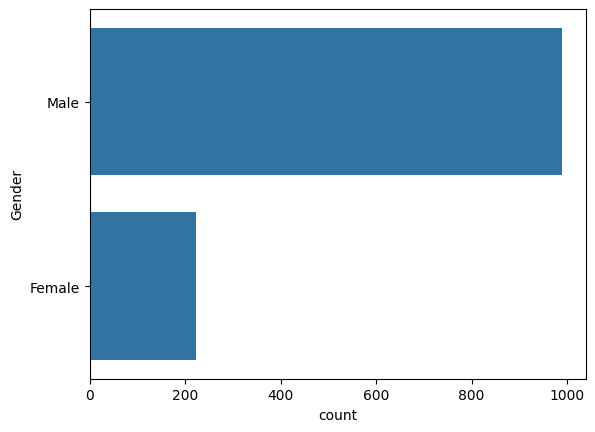

In [59]:
sns.countplot(train_df['Gender'])

<Axes: xlabel='Married'>

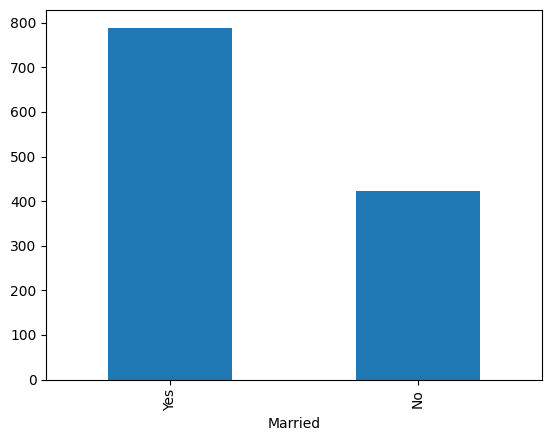

In [60]:
train_df['Married'].value_counts().plot(kind='bar')

<Axes: xlabel='Education'>

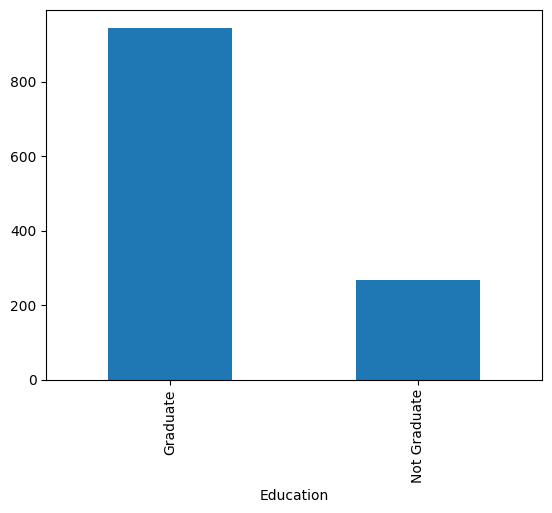

In [61]:
train_df['Education'].value_counts().plot(kind='bar')

<Axes: xlabel='Self_Employed'>

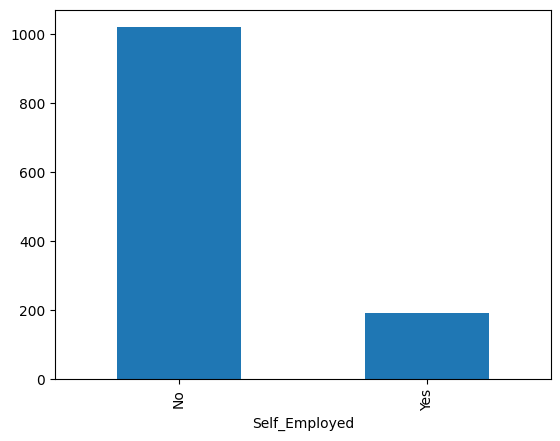

In [62]:
train_df['Self_Employed'].value_counts().plot(kind='bar')

<Axes: xlabel='Property_Area'>

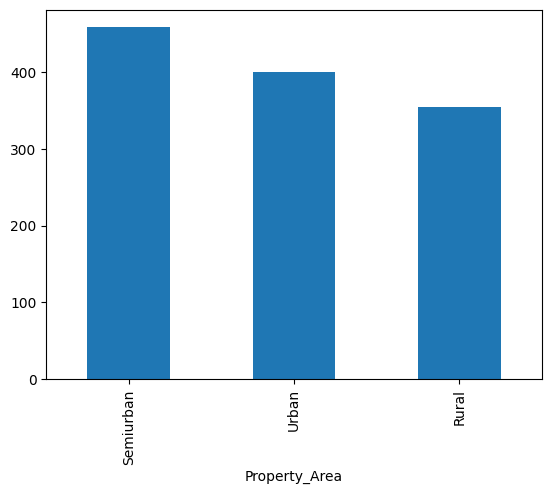

In [63]:
train_df['Property_Area'].value_counts().plot(kind='bar')

# Univariate 

# PieChart

<Axes: ylabel='count'>

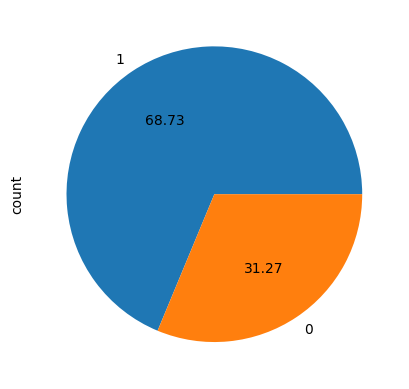

In [86]:
train_df['Loan_Status'].value_counts().plot(kind='pie',autopct='%.2f')

HeatMap (Categorical - Categorical)

In [76]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Risk_Cluster,Risk_Probability,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,4,0.55,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4,0.55,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4,0.55,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,8,0.15,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4,0.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4,0.55,1
1208,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,7,0.25,1
1209,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,0.85,1
1210,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,0.85,1


<Axes: xlabel='Self_Employed', ylabel='Gender'>

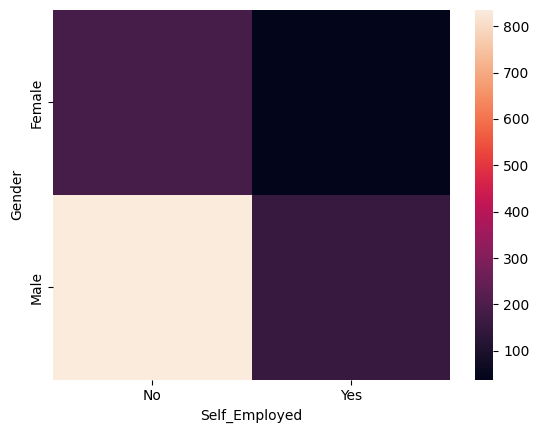

In [80]:
sns.heatmap(pd.crosstab(train_df['Gender'],train_df['Self_Employed']))

<Axes: xlabel='Property_Area', ylabel='Gender'>

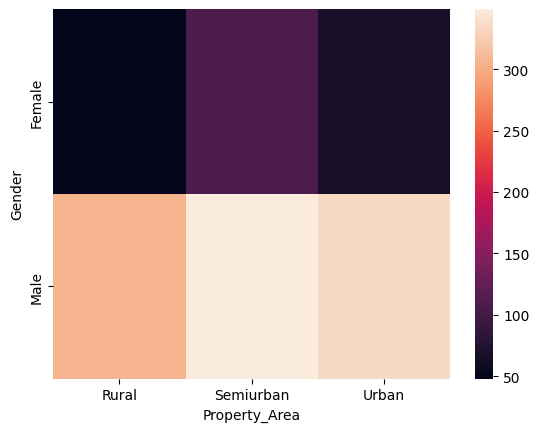

In [79]:
sns.heatmap(pd.crosstab(train_df['Gender'],train_df['Property_Area']))

<Axes: xlabel='Education', ylabel='Gender'>

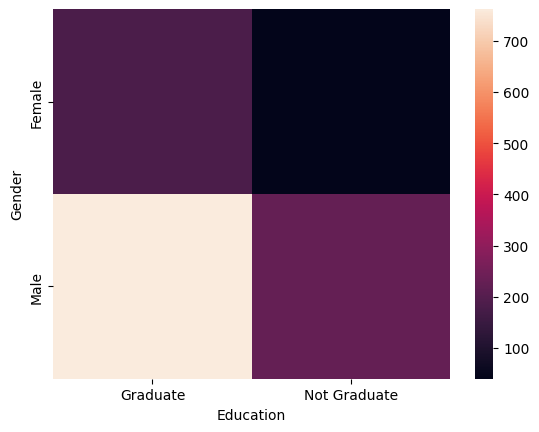

In [78]:
sns.heatmap(pd.crosstab(train_df['Gender'],train_df['Education']))

<Axes: xlabel='Married', ylabel='Gender'>

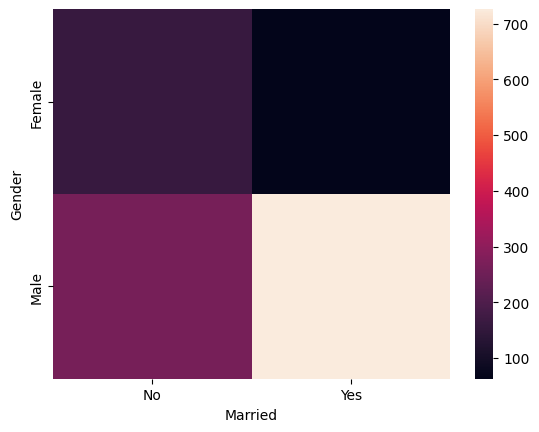

In [77]:
sns.heatmap(pd.crosstab(train_df['Gender'],train_df['Married']))

# ClusterMap (Categorical - Categorical)

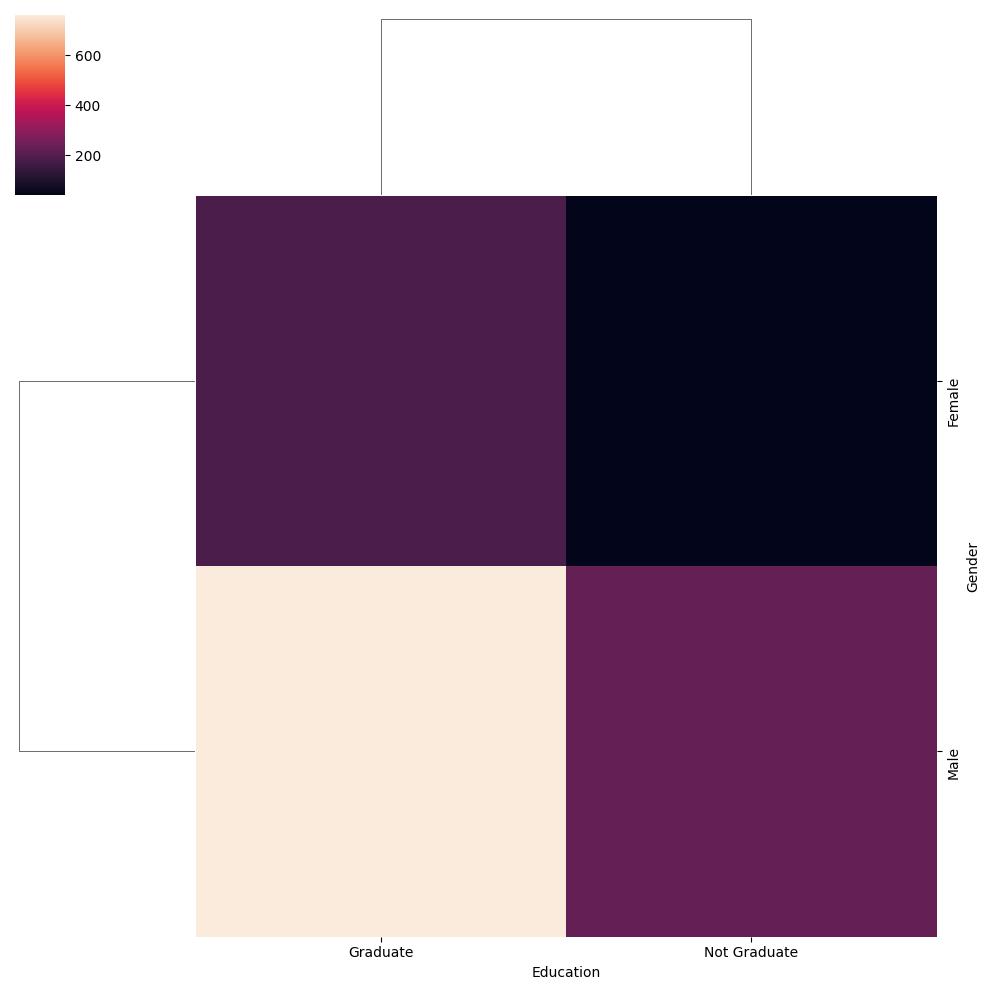

In [82]:
sns.clustermap(pd.crosstab(train_df['Gender'],train_df['Education']))

# Scatterplot (Numerical - Numerical)

In [83]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Risk_Cluster,Risk_Probability,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,127.0,360.0,1.0,Urban,4,0.55,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4,0.55,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4,0.55,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,8,0.15,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4,0.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,4,0.55,1
1208,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,7,0.25,1
1209,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,0.85,1
1210,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,0.85,1


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

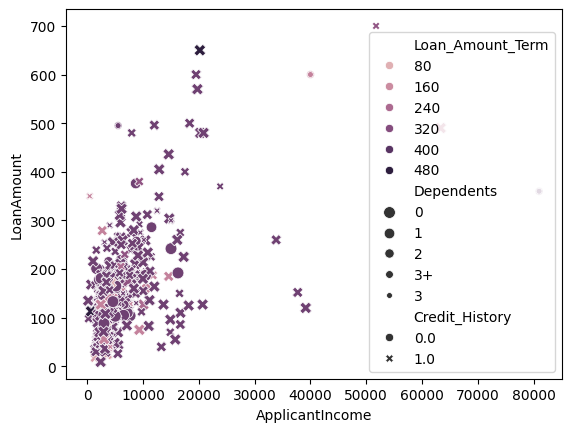

In [85]:
import seaborn as sns

sns.scatterplot(x=train_df['ApplicantIncome'], 
                y=train_df['LoanAmount'], 
                hue=train_df['Loan_Amount_Term'], 
                style=train_df['Credit_History'], 
                size=train_df['Dependents'])


In [64]:
print(len(numerical_columns))  # Should print 5

5


#### Analyze values assigned to columns 

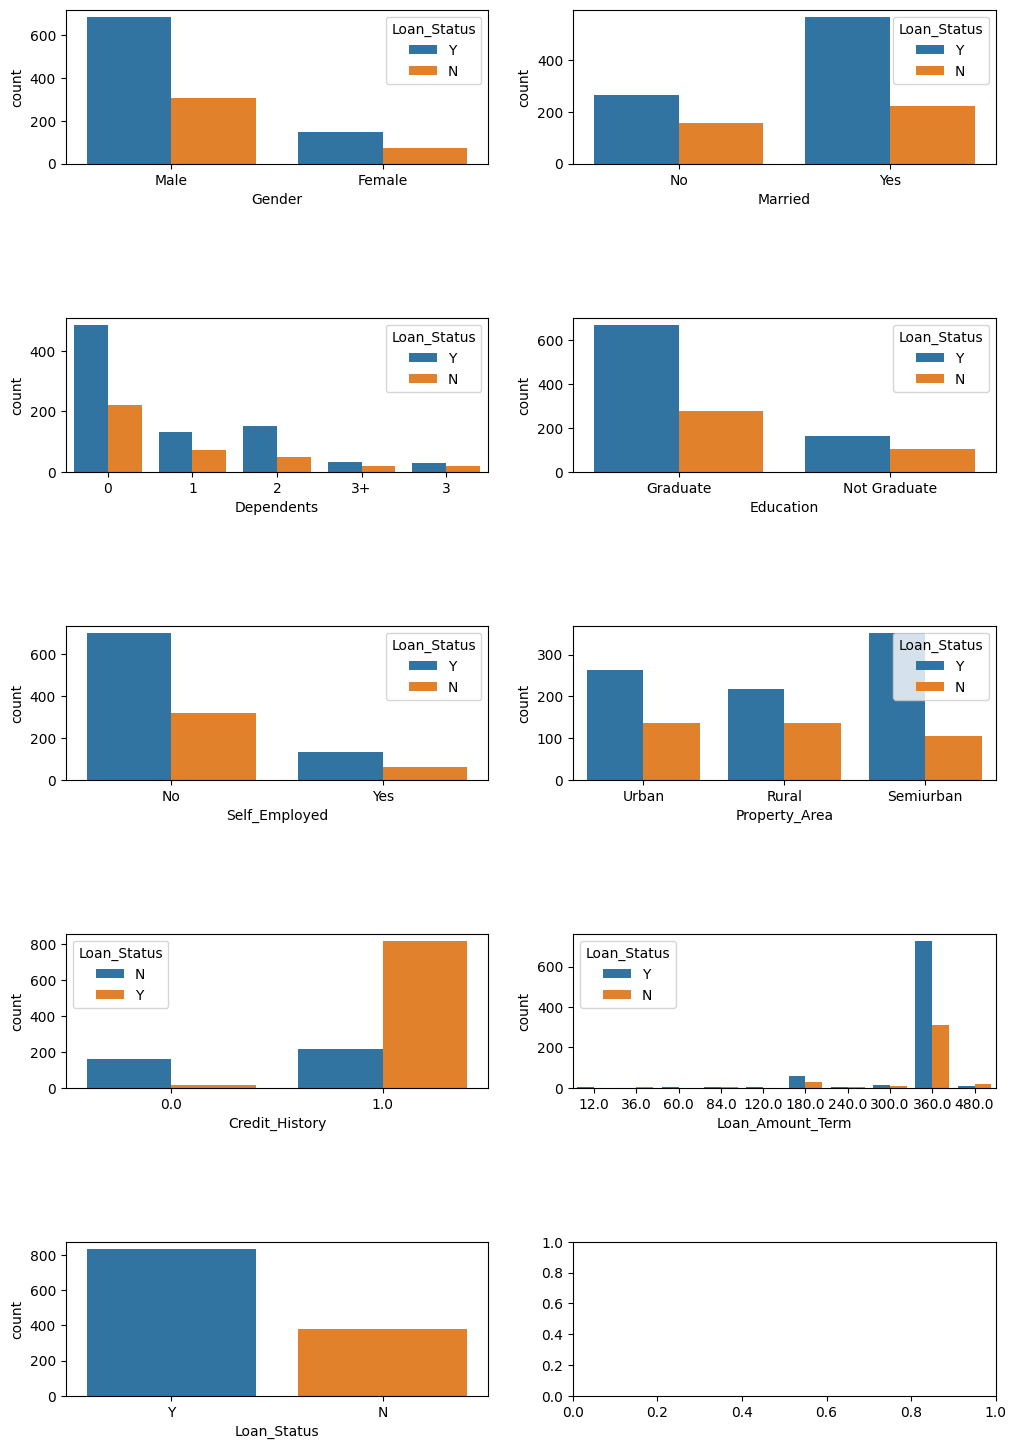

In [65]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(5, 2, figsize=(12, 18))

for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

#### Plots above convey following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men  than Women (approx. 3x) 
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

Now, let's also analyze Numerical Columns:

       ApplicantIncome  CoapplicantIncome   LoanAmount  Risk_Cluster  \
count      1212.000000        1212.000000  1212.000000   1212.000000   
mean       5348.589934        1626.305148   145.036304      4.769802   
std        5959.855470        2938.424771    82.708728      2.588926   
min         150.000000           0.000000     9.000000      0.000000   
25%        2876.000000           0.000000   100.000000      3.000000   
50%        3812.000000        1210.000000   127.000000      4.000000   
75%        5780.000000        2306.000000   164.250000      8.000000   
max       81000.000000       41667.000000   700.000000      9.000000   

       Risk_Probability  
count       1212.000000  
mean           0.473020  
std            0.258893  
min            0.050000  
25%            0.150000  
50%            0.550000  
75%            0.650000  
max            0.950000  


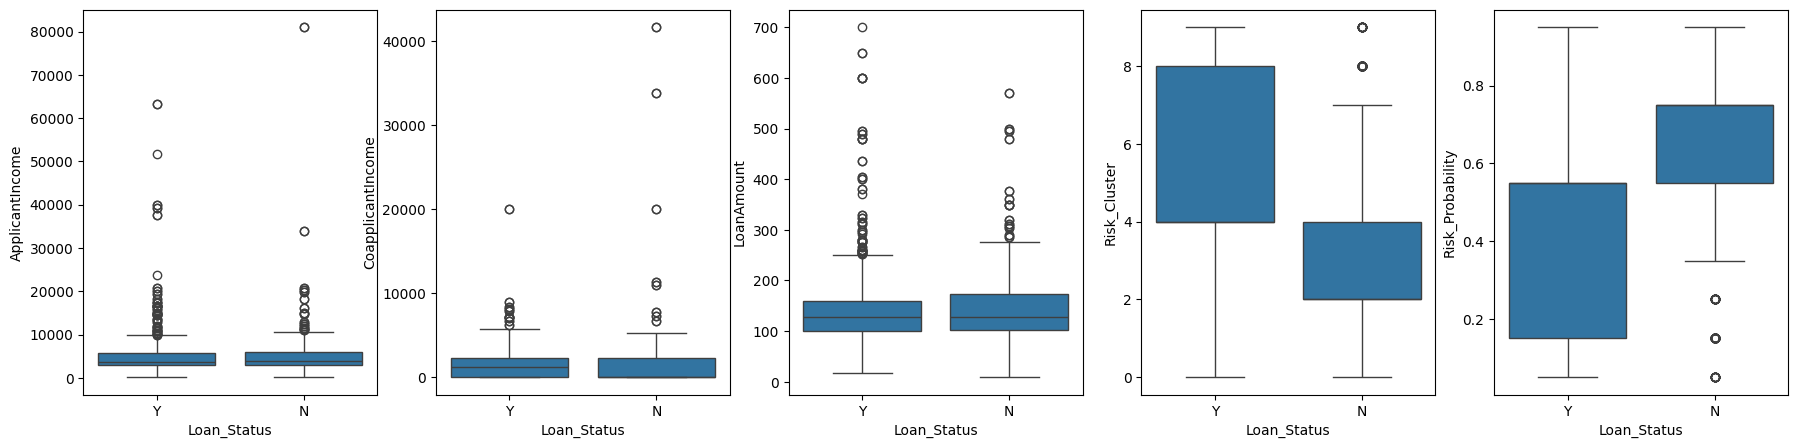

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(22, 5))  # Adjust the figsize if necessary
for idx, cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col, data=train_df, x='Loan_Status', ax=axes[idx])

print(train_df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)


For Numercical Columns, there is no significant relation to Loan approval status.


### Preprocessing Data:
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:
1. Encoding Categorical Features.
2. Imputing missing values

In [67]:
#### Encoding categrical Features: ##########
train_df_encoded = pd.get_dummies(train_df,drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Risk_Cluster,Risk_Probability,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,127.0,360.0,1.0,4,0.55,True,False,False,False,False,False,False,False,False,True,True
1,4583,1508.0,128.0,360.0,1.0,4,0.55,True,True,True,False,False,False,False,False,False,False,False
2,3000,0.0,66.0,360.0,1.0,4,0.55,True,True,False,False,False,False,False,True,False,True,True
3,2583,2358.0,120.0,360.0,1.0,8,0.15,True,True,False,False,False,False,True,False,False,True,True
4,6000,0.0,141.0,360.0,1.0,4,0.55,True,False,False,False,False,False,False,False,False,True,True


In [68]:
########## Split Features and Target Varible ############
X = train_df_encoded.drop(columns='Loan_Status_Y')
y = train_df_encoded['Loan_Status_Y']

################# Splitting into Train -Test Data #######
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)
############### Handling/Imputing Missing values #############
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
imp_train = imp.fit(X_train)
X_train = imp_train.transform(X_train)
X_test_imp = imp_train.transform(X_test)


### Model 1: Decision Tree Classifier


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score


tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_train)
print("Training Data Set Accuracy: ", accuracy_score(y_train,y_pred))
print("Training Data F1 Score ", f1_score(y_train,y_pred))

print("Validation Mean F1 Score: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.8670025199819804
Validation Mean Accuracy:  0.8833716147641686


#### Overfitting Problem
We can see from above metrics that Training Accuracy > Test Accuracy with default settings of Decision Tree classifier. Hence, model is overfit. We will try some Hyper-parameter tuning and see if it helps.

#### First let's try tuning 'Max_Depth' of tree


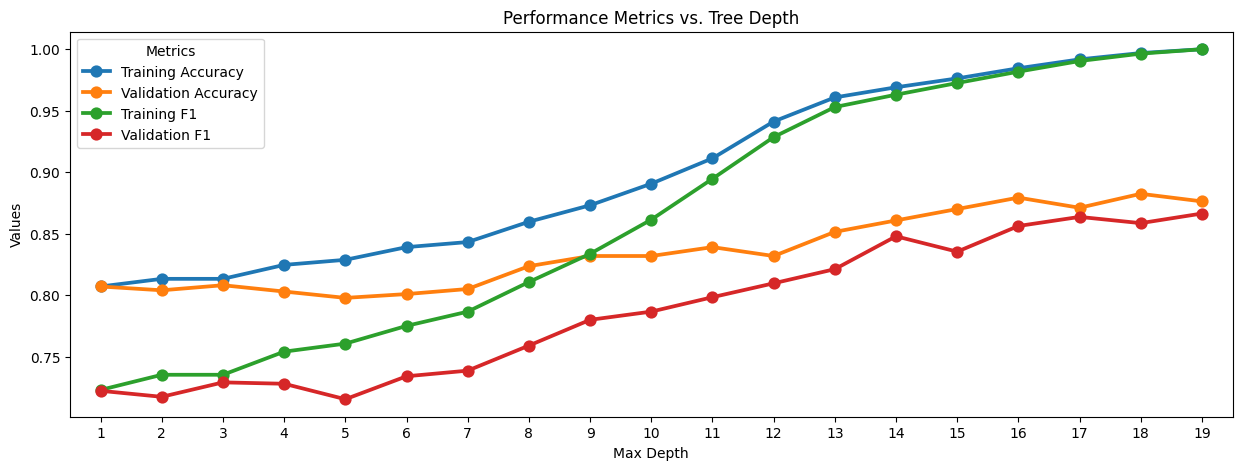

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Sample DataFrame creation (replace with your actual DataFrame)
# Assuming 'train_df' is your DataFrame and 'Loan_Status' is the target column
# data = pd.read_csv('your_dataset.csv')  # Load your dataset
data = train_df  # Use your actual DataFrame

# Encode target variable if it contains string labels
label_encoder = LabelEncoder()
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])  # Convert labels to numeric

# Separate features and target variable
X = data.drop(columns=['Loan_Status'])  # Features
y = data['Loan_Status']  # Target variable

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Preprocessing pipelines
# Categorical features preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Numerical features preprocessing
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing pipelines into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store metrics
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

# Iterate over different depths
for depth in range(1, 20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    # Create pipeline with current parameters
    pipeline.set_params(classifier=tree_clf)
    pipeline.fit(X_train, y_train)
    
    y_training_pred = pipeline.predict(X_train)
    
    # Calculate metrics
    training_acc = accuracy_score(y_train, y_training_pred)
    train_f1 = f1_score(y_train, y_training_pred, average='macro')
    val_mean_f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Store metrics
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    
# Create DataFrame for plotting
Tuning_Max_depth = {
    "Training Accuracy": training_accuracy,
    "Validation Accuracy": val_accuracy,
    "Training F1": training_f1,
    "Validation F1": val_f1,
    "Max_Depth": tree_depths
}
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

# Melt DataFrame for plotting
plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name='Values')

# Plot results
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.title('Performance Metrics vs. Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Values')
plt.show()


## Let's use this Decision Tree classifier on unseen test data and evaluate __Test Accuracy, F1 Score and Confusion Matrix__

# Perform Grid Search with Cross-Validation


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

# Sample DataFrame creation (replace with your actual DataFrame)
# Assuming 'train_df' is your DataFrame and 'Loan_Status' is the target column
# data = pd.read_csv('your_dataset.csv')  # Load your dataset
data = train_df  # Use your actual DataFrame

# Encode target variable if it contains string labels
label_encoder = LabelEncoder()
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])  # Convert labels to numeric

# Separate features and target variable
X = data.drop(columns=['Loan_Status'])  # Features
y = data['Loan_Status']  # Target variable

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Preprocessing pipelines
# Categorical features preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Numerical features preprocessing
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing pipelines into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Create the full pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2']
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Cross-Validation F1 Score: ", best_score)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Train the best model on the entire training data
best_model.fit(X_train, y_train)

# Predict on the training data
y_pred_train_best = best_model.predict(X_train)

# Calculate accuracy and F1 score on training data using the best model
print("Training Data Set Accuracy (Best Model): ", accuracy_score(y_train, y_pred_train_best))
print("Training Data F1 Score (Best Model): ", f1_score(y_train, y_pred_train_best, average='macro'))

# Predict on the test data
y_pred_test_best = best_model.predict(X_test)

# Calculate accuracy and F1 score on test data using the best model
print("Test Data Set Accuracy (Best Model): ", accuracy_score(y_test, y_pred_test_best))
print("Test Data F1 Score (Best Model): ", f1_score(y_test, y_pred_test_best, average='macro'))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters:  {'classifier__criterion': 'entropy', 'classifier__max_depth': 50, 'classifier__max_features': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best Cross-Validation F1 Score:  0.8874135306499848
Training Data Set Accuracy (Best Model):  1.0
Training Data F1 Score (Best Model):  1.0
Test Data Set Accuracy (Best Model):  0.934156378600823
Test Data F1 Score (Best Model):  0.9244755244755245


### Model 2: Random Forest Classifier


In [72]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming your data is in 'df' DataFrame
# Replace these with actual column names
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']  # Example categorical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Split your dataset into features (X) and target (y)
X = train_df.drop('Loan_Status', axis=1)  # Assuming 'Loan_Status' is the target column
y = train_df['Loan_Status']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define the full pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=10, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on training data
y_train_pred = pipeline.predict(X_train)
print("Train F1 Score:", f1_score(y_train, y_train_pred, average='macro'))
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))

# Perform cross-validation on training data
f1_cv = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro').mean()
acc_cv = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
print("Validation Mean F1 Score:", f1_cv)
print("Validation Mean Accuracy:", acc_cv)


Train F1 Score: 0.7228485557620392
Train Accuracy: 0.8070175438596491
Validation Mean F1 Score: 0.7221217522977785
Validation Mean Accuracy: 0.806981464665349


#### Random Forest: Test Data Evaluation

In [73]:
# Predict on the test data
y_test_pred = pipeline.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred, average='macro'))

# Display the confusion matrix
print("Confusion Matrix on Test Data")
conf_matrix = pd.crosstab(y_test, y_test_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(conf_matrix)

Test Accuracy: 0.8148148148148148
Test F1 Score: 0.7496164678405421
Confusion Matrix on Test Data
Predicted   0    1  All
True                   
0          37   40   77
1           5  161  166
All        42  201  243


Random Forest gives same results as Decision Tree Classifier.
Finally, we will try Logistic Regression Model by sweeping threshold values.

### Model 3: Logistic Regression

Class Distribution in the Target Variable:
Loan_Status
1    833
0    379
Name: count, dtype: int64

Class Distribution in Training Set:
Loan_Status
1    666
0    303
Name: count, dtype: int64


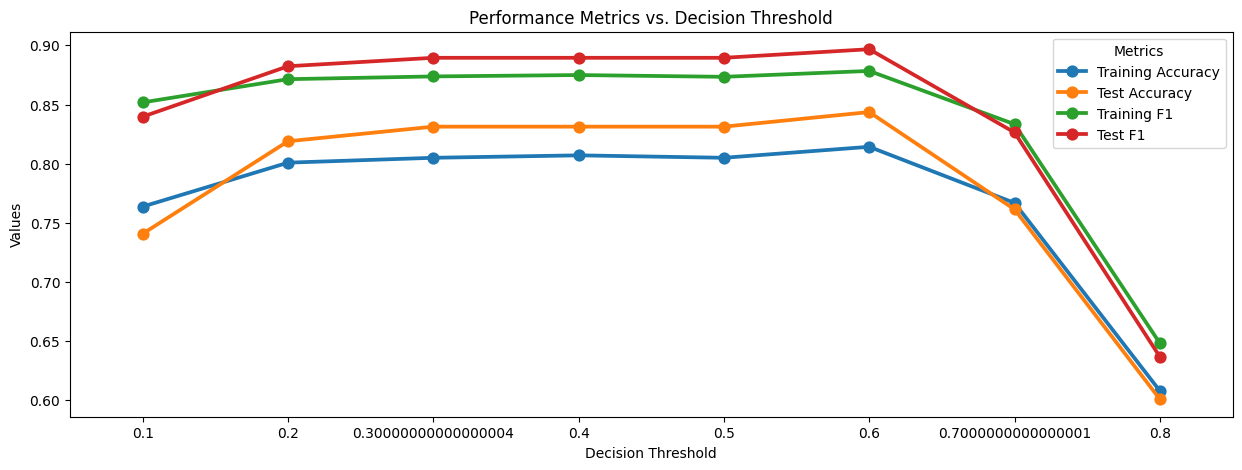

In [74]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('final_dataset.csv')

# Define the categorical and numerical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area']  # Adjust based on actual data
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Split the dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)  # Assuming 'Loan_Status' is the target column
y = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0)  # Convert target to binary 0/1 if not already

# Check the class distribution
print("Class Distribution in the Target Variable:")
print(y.value_counts())

# Split the data into training and test sets using stratified splitting to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify class distribution in training set
print("\nClass Distribution in Training Set:")
print(y_train.value_counts())

# Define a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Create the final pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Initialize lists to store metrics
train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

# Sweeping threshold values from 0.1 to 0.9
for thresh in np.arange(0.1, 0.9, 0.1):
    # Predict probabilities on training data
    y_pred_train_thresh = pipeline.predict_proba(X_train)[:, 1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    # Calculate training accuracy and F1 score
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    # Predict probabilities on test data
    y_pred_test_thresh = pipeline.predict_proba(X_test)[:, 1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int)
    
    # Calculate test accuracy and F1 score
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    
    # Append metrics to lists
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)

# Create a DataFrame to store metrics
Threshold_logreg = {
    "Training Accuracy": train_accuracies,
    "Test Accuracy": test_accuracies,
    "Training F1": train_f1_scores,
    "Test F1": test_f1_scores,
    "Decision Threshold": thresholds
}
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

# Melt the DataFrame for plotting
plot_df = Threshold_logreg_df.melt('Decision Threshold', var_name='Metrics', value_name="Values")

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
sns.pointplot(x="Decision Threshold", y="Values", hue="Metrics", data=plot_df, ax=ax)
plt.title("Performance Metrics vs. Decision Threshold")
plt.show()


Logistic Regression Confusion matrix is very similar to Decision Tree and Random Forest Classifier.
In this analysis, we did extensive analysis of input data and were able to achieve Test Accuracy of  __93 %__




In [75]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Assume your data is already loaded into DataFrame df
# Define the columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Split your dataset into features (X) and target (y)
X = df.drop('Loan_Status', axis=1)  # Adjust 'Loan_Status' to the actual target column in your dataset
y = df['Loan_Status']

# Convert categorical labels to numeric (0, 1) if necessary
y = y.map({'N': 0, 'Y': 1})  # Assuming 'N' stands for 0 and 'Y' stands for 1

# Split the data into training and test sets
X_train, X_test_imp, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # OneHotEncoder to handle categorical variables
    ]
)

# Create a pipeline with preprocessing and Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Define the chosen threshold based on performance evaluation
thresh = 0.4  # Adjust based on your prior analysis or preference

# Predict probabilities on the test data
y_pred_test_thresh = pipeline.predict_proba(X_test_imp)[:, 1]  # Use the second column for probability of class 1
# Convert probabilities to binary predictions using the chosen threshold
y_pred = (y_pred_test_thresh > thresh).astype(int)

# Calculate and print test accuracy and F1 score
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred)

print("Test Accuracy: ", test_accuracy)
print("Test F1 Score: ", test_f1_score)

# Display the confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print("Confusion Matrix on Test Data")
print(confusion_matrix)


Test Accuracy:  0.8076923076923077
Test F1 Score:  0.8736462093862816
Confusion Matrix on Test Data
Predicted   0    1  All
True                   
0          52   63  115
1           7  242  249
All        59  305  364
